<a href="https://colab.research.google.com/github/Luibov15/PTLab1/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_%E2%84%962_%D0%A1%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Этап 1. Подгрузка файлов

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving TC.csv to TC.csv


# Этап 2. Чтение файлов

In [ ]:
# импортируем модуль os
import os

# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):

  # во вложенном цикле проходимся по названиям файлов
  for filename in filenames:

    # и соединяем путь до папок и входящие в эти папки файлы
    # с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/TC.csv
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/configurations/config_default
/content/.config/logs/2025.01.23/14.23.48.900700.log
/content/.config/logs/2025.01.23/14.23.47.935211.log
/content/.config/logs/2025.01.23/14.23.18.284998.log
/content/.config/logs/2025.01.23/14.23.38.428932.log
/content/.config/logs/2025.01.23/14.23.59.968748.log
/content/.config/logs/2025.01.23/14.23.59.299874.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv


In [ ]:
# посмотрим на содержимое папки content
!ls

sample_data  TC.csv


In [ ]:
# заглянем внутрь sample_data
!ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
# посмотрим на тип значений словаря uploaded
type(uploaded['TC.csv'])

bytes

In [ ]:
# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded['TC.csv'].decode()

# на выходе получаем обычную строку
print(type(uploaded_str))

<class 'str'>


In [ ]:
# выведем первые 35 значений
print(uploaded_str[:35])

CustomerID,Genre,Age,Annual Income 


In [ ]:
# если разбить строку методом .split() по символам \r (возврат к началу строки) и \n (новая строка)
uploaded_list = uploaded_str.split('\r\n')

# на выходе мы получим список
type(uploaded_list)

list

In [ ]:
# пройдемся по этому списку, не забыв создать индекс с помощью функции enumerate()
for i, line in enumerate(uploaded_list):

  # начнем выводить записи
  print(line)

  # когда дойдем до четвертой строки
  if i == 3:

    # прервемся
    break

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6


In [ ]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/TC.csv', 'r')

# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
print(f1.read(142))

# в конце файл необходимо закрыть
f1.close()

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6
0004,Female,23,16,77



In [ ]:
# снова откроем файл
f2 = open('/content/TC.csv', 'r')

# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):

    # выведем строки без служебных символов по краям
    print(line.strip())

    # дойдя до четвертой строки, прервемся
    if i == 3:
      break

# не забудем закрыть файл
f2.close()

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6


In [ ]:
# скажем Питону: "открой файл  и назови его f3"
with open('/content/TC.csv', 'r') as f3:

  # "пройдись по строкам без служебных символов"
  for i, line in enumerate(f3):
    print(line.strip())

    # и "прервись на четвертой строке"
    if i == 3:
      break

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6


In [ ]:
# импортируем библиотеку
import pandas as pd

# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/TC.csv')
train.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('/content/TC.csv')
test.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Шаг 3. Построение модели и прогноз

In [ ]:
# посмотрим на данные в целом
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

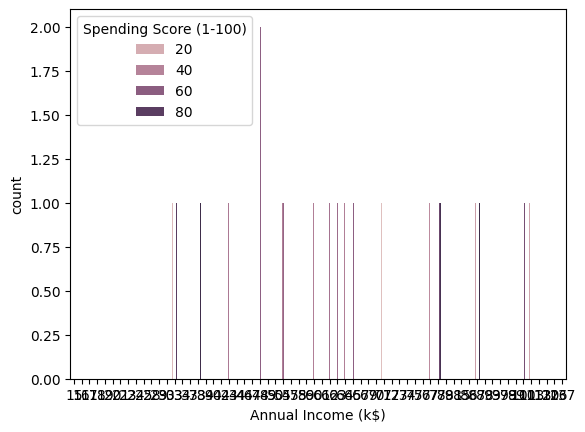

In [ ]:
# посмотрим годовой доход клиента
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'Annual Income (k$)', hue = 'Spending Score (1-100)', data = train)

<Axes: xlabel='Genre', ylabel='count'>

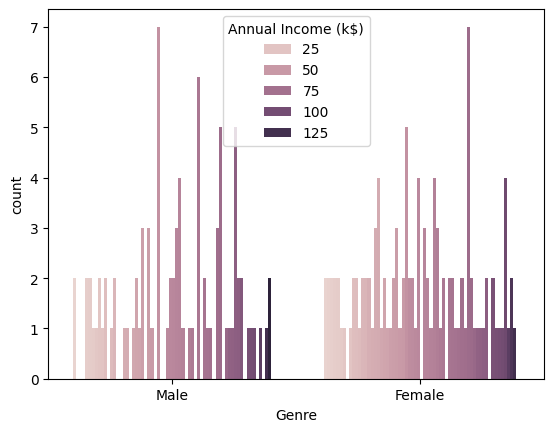

In [ ]:
# кто зарабатывал больше, мужчины или женщины?
sns.countplot(x = 'Genre', hue = 'Annual Income (k$)', data = train)

In [ ]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
train.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# применим one-hot encoding к переменной Sex (пол) с помощью функции pd.get_dummies()
pd.get_dummies(train['Genre']).head(10)

,Female,Male
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False
5,True,False
6,True,False
7,True,False
8,False,True
9,True,False


In [ ]:
# снова скачаем столбец Genre из датасета TC в формате датафрейма
previous = pd.read_csv('/content/TC.csv')[['Genre']]
previous.head(10)

,Genre
0,Male
1,Male
2,Female
3,Female
4,Female
5,Female
6,Female
7,Female
8,Male
9,Female


In [ ]:
# закодируем переменную через 0 и 1
pd.get_dummies(previous['Genre'], dtype = int).head(10)

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [ ]:
# Проверим, существует ли у нас запрашиваемый столбец
print(train.columns)
# удалим первый столбец, он избыточен
sex = pd.get_dummies(previous['Genre'], drop_first = True)
sex.head(10)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


,Male
0,True
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,True
9,False


In [ ]:
# Проверим теперь, какие из столбцов у нас присутствуют в датасете
print(train.columns)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [ ]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Annual Income (k$)', 'Spending Score (1-100)']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
train.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,-1.738999,-0.434801
1,21,-1.738999,1.195704
2,20,-1.700830,-1.715913
3,23,-1.700830,1.040418
4,31,-1.662660,-0.395980
5,22,-1.662660,1.001596
6,35,-1.624491,-1.715913
7,23,-1.624491,1.700384
8,64,-1.586321,-1.832378
9,30,-1.586321,0.846310


In [ ]:
# поместим в X_train все кроме столбца Spending Score (1-100)
X_train = train.drop('Spending Score (1-100)', axis = 1)

# столбец 'Spending Score (1-100)' станет нашей целевой переменной (y_train)
y_train = train['Spending Score (1-100)']

In [ ]:
X_train.head(10)

,Age,Annual Income (k$)
0,19,-1.738999
1,21,-1.738999
2,20,-1.700830
3,23,-1.700830
4,31,-1.662660
5,22,-1.662660
6,35,-1.624491
7,23,-1.624491
8,64,-1.586321
9,30,-1.586321


In [ ]:
from sklearn.linear_model import LinearRegression

# линейная регрессия
model = LinearRegression()
model.fit(X_train, y_train)

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Преобруем непрерывные значения в классы
y_train = (y_train > 0.5).astype(int)
y_pred_train = (y_pred_train > 0.5).astype(int)

# Построем матрицы ошибок
conf_matrix = confusion_matrix(y_train, y_pred_train)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

          Predicted 0  Predicted 1
Actual 0          141            0
Actual 1           59            0


In [ ]:
# рассчитаем метрику accuracy вручную
round((141 + 0)/(141 + 0 + 0 + 59), 3)

0.705

In [ ]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.705

# Этап 4. Сохранение нового файла на сервере Google

In [ ]:
import pandas as pd

# Применим One-Hot Encoding к столбцу 'Genre'
data_encoded = pd.get_dummies(data, columns=['Genre'], drop_first=True)

# Посмотрим на результат
print(data_encoded.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
0           1   19                  15                      39        True
1           2   21                  15                      81        True
2           3   20                  16                       6       False
3           4   23                  16                      77       False
4           5   31                  17                      40       False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Применяем к столбцу 'Genre'
data['Genre'] = label_encoder.fit_transform(data['Genre'])

# Посмотрим на результат
print(data.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Загрузим данные
data = pd.read_csv('TC.csv')

# Применим One-Hot Encoding к категориальным столбцам
data_encoded = pd.get_dummies(data, columns=['Genre'], drop_first=True)

# Разделим данные на признаки (X) и целевую переменную (y)
X = data_encoded.drop('Age', axis=1)  # Признаки (все столбцы, кроме 'Age')
y = data_encoded['Age']  # Целевая переменная (столбец 'Age')

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучим модель
model = LogisticRegression()
model.fit(X_train, y_train)

# Сделаем прогнозы
y_pred_test = model.predict(X_test)

# Создадим DataFrame с результатами
result = pd.DataFrame({'Genre': X_test['Genre_Male'], 'Prediction': y_pred_test})
print(result.head())

     Genre  Prediction
95    True          32
15    True          23
30    True          53
158   True          44
128   True          47


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


# Этап 5. Скачивание обратно на жесткий диск

In [ ]:
# применим метод .download() объекта files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>